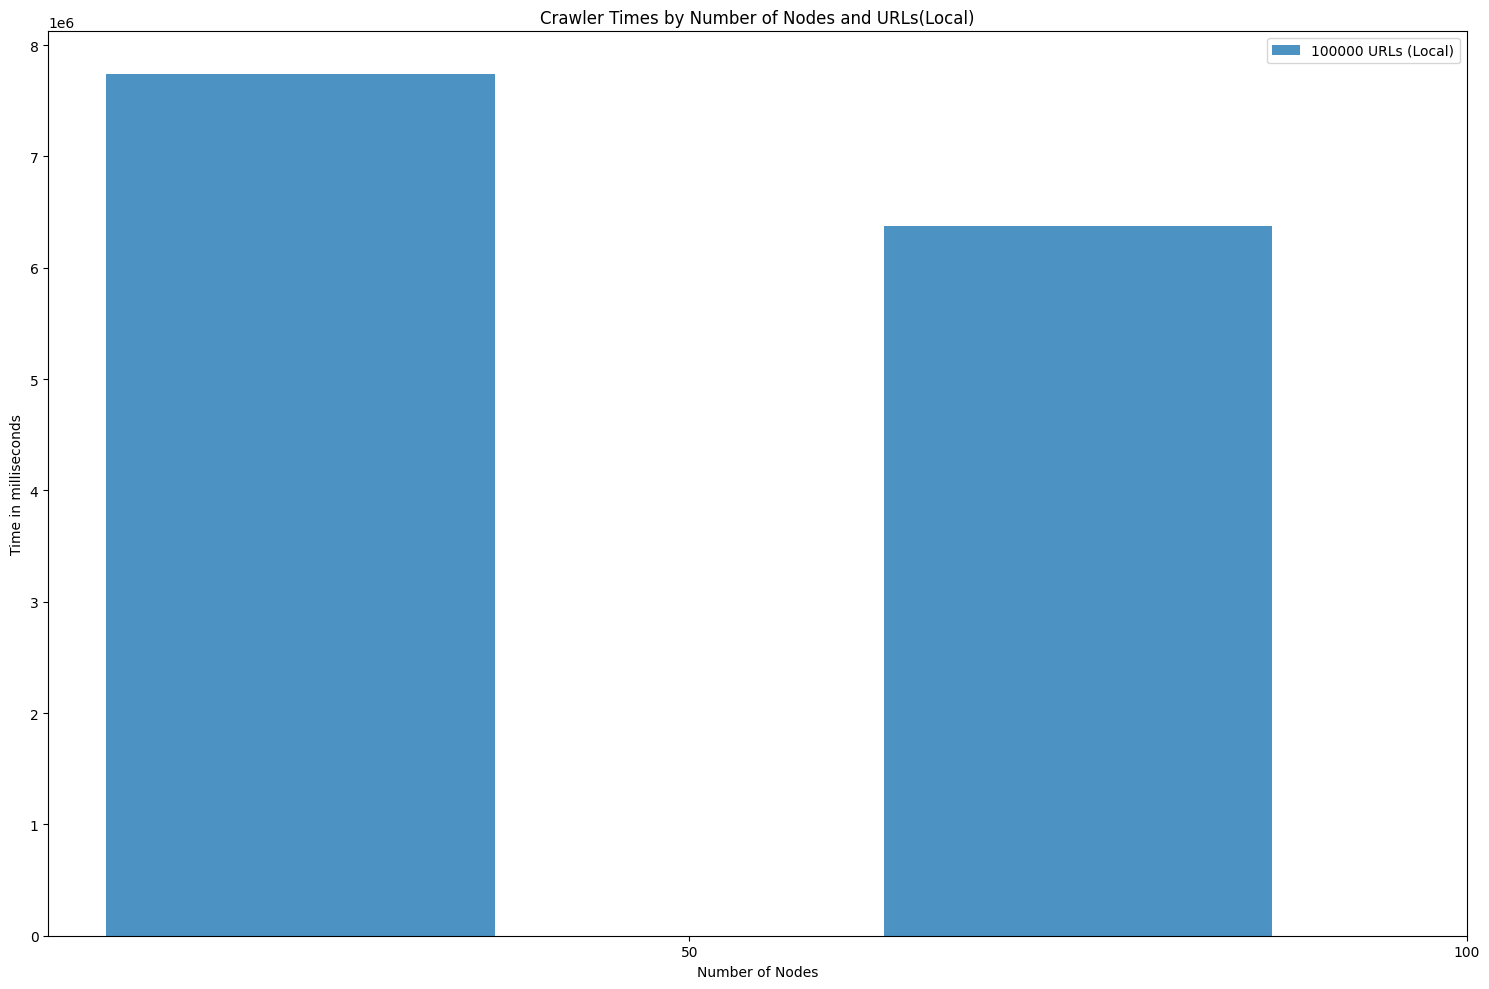

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Data
nodes = [1, 3, 5, 10, 20, 50, 100]
urls = [100, 1000, 10000, 100000]
loader_times = {
    100: [319.0766, 416.3078, 440.3973, 401.5058, 1567.1728, 1243.9614, 4557.2695],
    1000: [2316.4236, 2510.1274, 2355.2173, 7138.1299, 21606.6930, 12781.5355, 38143.1212],
    10000: [0,0,0,0,  346120.1199, 122487.9170,143991.8421,],
    100000: [0,0,0,0,0,3065999.1978, 4136852.5101]
}
scraper_times = {
    100: [31972.1210, 11648.2872, 7415.6552, 7175.8957, 10572.3475, 2405.2607, 2298.2232],
    1000: [328322.4210, 65297.7338, 69297.7338, 64738.8516, 63993.7945, 21045.4778, 25521.8858],
    10000: [0,0, 0, 0,  248200.1649, 231678.3084,108797.2259],
    100000: [0,0,0,0,0,4670090.9305, 3233594.2643]
}

combined_times = {}

for url_count in urls:
    combined_times[url_count] = [loader_time + scraper_time for loader_time, scraper_time in zip(loader_times[url_count], scraper_times[url_count])]


# Plot configuration
bar_width = 0.3
opacity = 0.8

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 10))

for i, url_count in enumerate(urls):
    index = np.arange(len(nodes))
    dev = ' (EC2)'
    if url_count > 10000:
        dev = ' (Local)'
        # continue
        loader_bar = ax.bar(index + bar_width*i, combined_times.get(url_count, [0]*len(nodes)), bar_width,
                        alpha=opacity, label=f'{url_count} URLs{dev}')

    # scraper_bar = ax.bar(index + bar_width*i, scraper_times.get(url_count, [0]*len(nodes)), bar_width,
    #                      alpha=opacity, label=f'{url_count} URLs{dev}', bottom=loader_times.get(url_count, [0]*len(nodes)))

# Adding labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time in milliseconds')
ax.set_title('Crawler Times by Number of Nodes and URLs(EC2)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(nodes)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# for i, url_count in enumerate(urls):
#     index = np.arange(len(nodes))
#     if url_count >= 10000:
#         loader_bar = ax.bar(index + bar_width*i, loader_times.get(url_count, [0]*len(nodes)), bar_width,
#                             alpha=opacity, label=f'{url_count} URLs (local)')

#         scraper_bar = ax.bar(index + bar_width*i, scraper_times.get(url_count, [0]*len(nodes)), bar_width,
#                             alpha=opacity, label=f'{url_count} URLs (local)', bottom=loader_times.get(url_count, [0]*len(nodes)))

# # Adding labels and title
# ax.set_xlabel('Number of Nodes')
# ax.set_ylabel('Time in milliseconds')
# ax.set_title('Crawler Times by Number of Nodes and URLs')
# ax.set_xticks(index + bar_width)
# ax.set_xticklabels(nodes)
# ax.legend()

# # Display the plot
# plt.tight_layout()
# plt.show()
